In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: xlabel='Sex'>

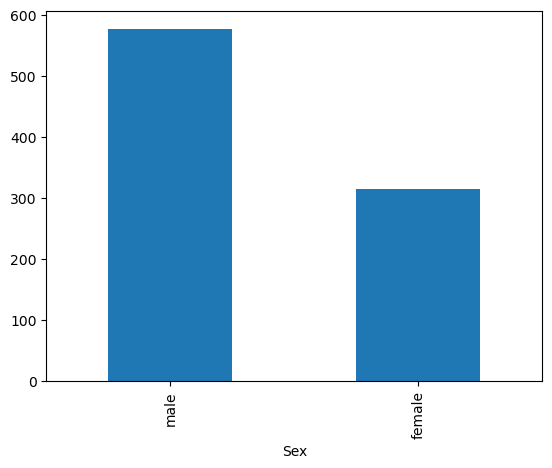

In [7]:
df["Sex"].value_counts().plot(kind="bar")

<Axes: xlabel='Cabin'>

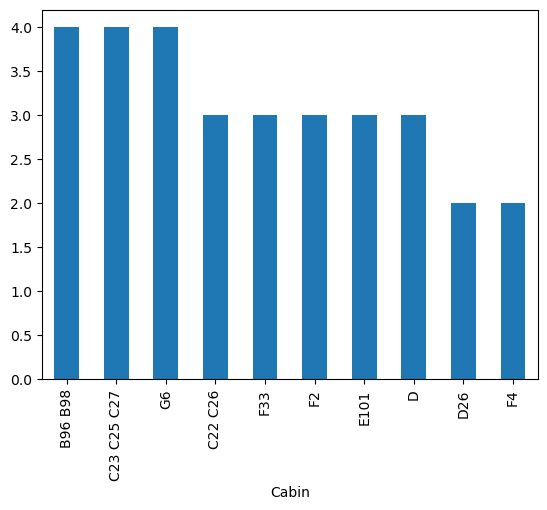

In [12]:
df["Cabin"].value_counts().sort_values(ascending=False).head(10).plot(kind="bar")

<Axes: ylabel='count'>

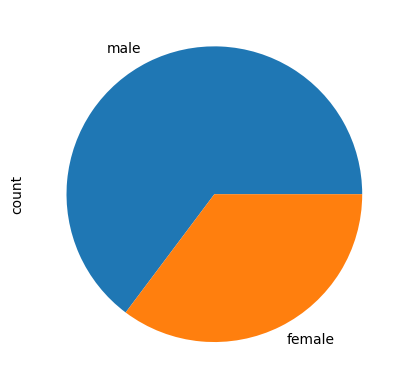

In [13]:
df["Sex"].value_counts().plot(kind="pie")

In [18]:
df["Parch"].value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

In [ ]:
Numerical = df.select_dtypes(include=['Int64',"Float64"])

In [47]:
Numerical_features = ["Age", "Fare", "SibSp","Parch"]
Numerical_features

['Age', 'Fare', 'SibSp', 'Parch']

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression

In [54]:
Selected_features = ["Age", "Fare", "SibSp","Parch"]
x = df[Selected_features]
y = df["Survived"]

In [55]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size=0.2)

In [56]:
Numerical_Transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy="median")),
    ('scaler', StandardScaler())
])

In [57]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", Numerical_Transformer, Selected_features)
    ]
)

In [58]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

In [59]:
model.fit(X_train,Y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Fare', 'SibSp',
                                                   'Parch'])])),
                ('classifier', LogisticRegression())])

In [60]:
y_pred = model.predict(X_test)

In [65]:
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
accuracy = accuracy_score(Y_test,y_pred)
mse = mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)
print("Accuracy Score: ", accuracy*100, "%")
print("MSE Score: ", mse)
print("R2 Score: ", r2)

Accuracy Score:  68.71508379888269 %
MSE Score:  0.3128491620111732
R2 Score:  -0.3440600697237859
